# Basic Data Analysis
## fa-23-team-a

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
df = pd.read_csv("bu_athletics_data.csv")
df.head()

,Data Input Year,Student,State,US Region,Country,English Language Primary Language of Country,IPEDS Race Description,Athletic Code 1,Team Gender,Athletic Code Description 1,...,Semester GPI-13th Sem,Semester GPI-14th Sem,Semester GPI-15th Sem,Semester GPI-16th Sem,Semester GPI-17th Sem,Semester GPI-18th Sem,Semester GPI-19th Sem,Semester GPI-20th Sem,Semester GPI-21st Sem,Semester GPI-22nd Sem
0,2022,1,NaN,NaN,Canada,English,Non-Resident Alien,HC,M,MEN'S ICE HOCKEY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,2,CT,NaN,NaN,NaN,African American or Black,SC,M,MEN'S SOCCER,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023,3,CA,NaN,NaN,NaN,White,MC,M,MEN'S ROWING,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,14,NaN,NaN,Italy,Non-English,Non-Resident Alien,SC,M,MEN'S SOCCER,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023,15,NaN,NaN,Germany,Non-English,Non-Resident Alien,MC,M,MEN'S ROWING,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Range of accepted highschool GPA

In [11]:
max_hs_gpa = df["HSGPA"].max()
min_hs_gpa = df["HSGPA"].min()
print("Maximum highschool GPA:", max_hs_gpa)
print("Minimum highschool GPA:", min_hs_gpa)

Maximum highschool GPA: 4.3
Minimum highschool GPA: 2.2


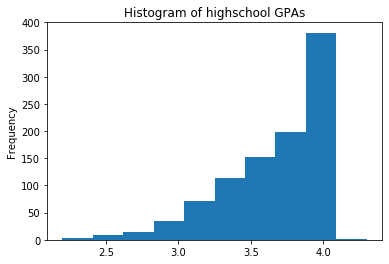

In [31]:
hsgpa_no_na = df["HSGPA"].dropna()
plt.hist(hsgpa_no_na, bins=10)
plt.title("Histogram of highschool GPAs")
plt.ylabel("Frequency")
plt.show()

### Range of accepted SAT/ACT scores

In [34]:
min_sat = df["SATCFORAI"].min()
max_sat = df["SATCFORAI"].max()
print("Maximum SAT score:", max_sat)
print("Minimum SAT score:", min_sat)

Maximum SAT score: 1600.0
Minimum SAT score: 950.0


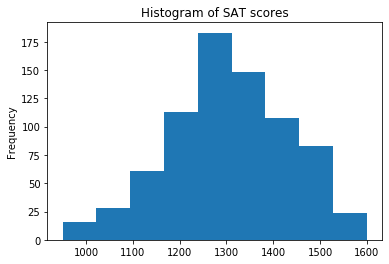

In [38]:
sat_no_na = df["SATCFORAI"].dropna()
plt.hist(sat_no_na, bins=9)
plt.title("Histogram of SAT scores")
plt.ylabel("Frequency")
plt.show()

### Student composition

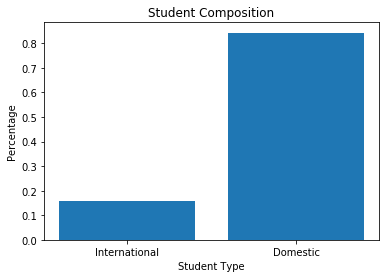

In [51]:
num_intl = df["State"].isna().sum()
num_domestic = df.shape[0] - num_intl
comp = ["International", "Domestic"]
comp_percent = [num_intl / (num_intl + num_domestic), num_domestic / (num_intl + num_domestic)]
plt.bar(comp, comp_percent, width=0.8)
plt.xlabel("Student Type")
plt.ylabel("Percentage")
plt.title("Student Composition")
plt.show()

### Effect of English being the primary language on highschool/SAT/ACT performance

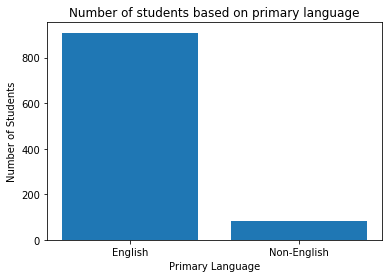

In [76]:
num_english = df[(df["State"].notna()) | 
                   (df["English Language Primary Language of Country"] == 'English')].shape[0]
num_non_english = df[df["English Language Primary Language of Country"] == 'Non-English'].shape[0]
primary_lang = ["English", "Non-English"]
count = [num_english, num_non_english]
plt.bar(primary_lang, count, width=0.8)
plt.xlabel("Primary Language")
plt.ylabel("Number of Students")
plt.title("Number of students based on primary language")
plt.show()

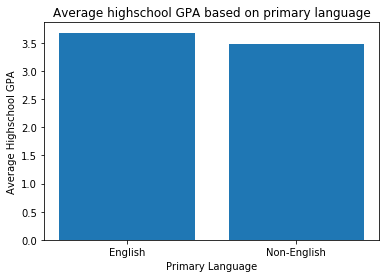

In [56]:
hsgpa_english = df[(df["State"].notna()) | 
                   (df["English Language Primary Language of Country"] == 'English')]["HSGPA"].mean()
hsgpa_non_english = df[df["English Language Primary Language of Country"] == 'Non-English']["HSGPA"].mean()
primary_lang = ["English", "Non-English"]
performance = [hsgpa_english, hsgpa_non_english]
plt.bar(primary_lang, performance, width=0.8)
plt.xlabel("Primary Language")
plt.ylabel("Average Highschool GPA")
plt.title("Average highschool GPA based on primary language")
plt.show()

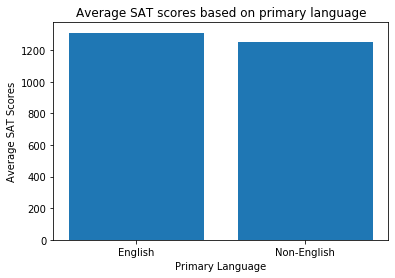

In [57]:
sat_english = df[(df["State"].notna()) | 
                   (df["English Language Primary Language of Country"] == 'English')]["SATCFORAI"].mean()
sat_non_english = df[df["English Language Primary Language of Country"] == 'Non-English']["SATCFORAI"].mean()
primary_lang = ["English", "Non-English"]
performance = [sat_english, sat_non_english]
plt.bar(primary_lang, performance, width=0.8)
plt.xlabel("Primary Language")
plt.ylabel("Average SAT Scores")
plt.title("Average SAT scores based on primary language")
plt.show()